In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [2]:
activity = pd.read_csv(os.path.join('andrew_data2.csv'))
activity.head()

,id,type,type_m,x_gear_name,start_date_local,x_start_h,name,x_min,x_km,x_min/km,...,start_longitude,timezone,total_photo_count,trainer,upload_id,upload_id_str,utc_offset,x_date,x_elev_%,x_url
0,2051690684,Run,Run,NaN,01.01.2019,15.6,Afternoon Run,65.5,11.425,5.73,...,-116.960523,(GMT-08:00) America/Los_Angeles,0,0,2192263908,2192263908,-28800,1/1/2019,0.43,https://www.strava.com/activities/2051690684
1,2974419038,Run,Hike,NaN,01.01.2020,15.4,Afternoon Run,141.5,8.585,16.49,...,-116.972282,(GMT-08:00) America/Los_Angeles,0,0,3169462081,3169462081,-28800,1/1/2020,3.98,https://www.strava.com/activities/2974419038
2,1432710517,Run,Run,NaN,01.03.2018,7.4,Morning Run,48.7,8.434,5.77,...,-116.960436,(GMT-08:00) America/Los_Angeles,0,0,1545662477,1545662477,-28800,3/1/2018,0.96,https://www.strava.com/activities/1432710517
3,923785050,Run,Run,NaN,01.04.2017,6.8,Morning Run,172.2,32.301,5.33,...,-117.255867,(GMT-08:00) America/Los_Angeles,0,0,1023629735,1023629735,-25200,4/1/2017,0.86,https://www.strava.com/activities/923785050
4,1016023574,Run,Run,NaN,01.06.2017,6.4,Morning Run,82.4,16.159,5.10,...,-116.959949,(GMT-08:00) America/Los_Angeles,0,0,1118724262,1118724262,-25200,6/1/2017,0.83,https://www.strava.com/activities/1016023574


In [3]:
activity[["start_date_local"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   start_date_local  527 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB


In [4]:
activity["start_date_local"] = pd.to_datetime(activity["start_date_local"])
activity.head()

,id,type,type_m,x_gear_name,start_date_local,x_start_h,name,x_min,x_km,x_min/km,...,start_longitude,timezone,total_photo_count,trainer,upload_id,upload_id_str,utc_offset,x_date,x_elev_%,x_url
0,2051690684,Run,Run,NaN,2019-01-01,15.6,Afternoon Run,65.5,11.425,5.73,...,-116.960523,(GMT-08:00) America/Los_Angeles,0,0,2192263908,2192263908,-28800,1/1/2019,0.43,https://www.strava.com/activities/2051690684
1,2974419038,Run,Hike,NaN,2020-01-01,15.4,Afternoon Run,141.5,8.585,16.49,...,-116.972282,(GMT-08:00) America/Los_Angeles,0,0,3169462081,3169462081,-28800,1/1/2020,3.98,https://www.strava.com/activities/2974419038
2,1432710517,Run,Run,NaN,2018-01-03,7.4,Morning Run,48.7,8.434,5.77,...,-116.960436,(GMT-08:00) America/Los_Angeles,0,0,1545662477,1545662477,-28800,3/1/2018,0.96,https://www.strava.com/activities/1432710517
3,923785050,Run,Run,NaN,2017-01-04,6.8,Morning Run,172.2,32.301,5.33,...,-117.255867,(GMT-08:00) America/Los_Angeles,0,0,1023629735,1023629735,-25200,4/1/2017,0.86,https://www.strava.com/activities/923785050
4,1016023574,Run,Run,NaN,2017-01-06,6.4,Morning Run,82.4,16.159,5.10,...,-116.959949,(GMT-08:00) America/Los_Angeles,0,0,1118724262,1118724262,-25200,6/1/2017,0.83,https://www.strava.com/activities/1016023574


In [5]:
activity_clean = activity[["type", "type_m", "start_date_local", "x_start_h", "x_min", "average_heartrate", "max_heartrate", "average_cadence"]]
activity_clean.head()

,type,type_m,start_date_local,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
0,Run,Run,2019-01-01,15.6,65.5,NaN,NaN,83.6
1,Run,Hike,2020-01-01,15.4,141.5,95.0,124.0,53.2
2,Run,Run,2018-01-03,7.4,48.7,151.7,186.0,84.2
3,Run,Run,2017-01-04,6.8,172.2,156.5,193.0,84.4
4,Run,Run,2017-01-06,6.4,82.4,158.2,183.0,86.1


In [6]:
data2 = activity_clean.dropna()
data2.head()

,type,type_m,start_date_local,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
1,Run,Hike,2020-01-01,15.4,141.5,95.0,124.0,53.2
2,Run,Run,2018-01-03,7.4,48.7,151.7,186.0,84.2
3,Run,Run,2017-01-04,6.8,172.2,156.5,193.0,84.4
4,Run,Run,2017-01-06,6.4,82.4,158.2,183.0,86.1
5,Run,Run,2019-01-06,8.1,20.1,141.4,169.0,85.8


In [38]:
train_data = data2[(data2['start_date_local'] < '2019-12-03')] 
train_data.shape
train_data["type"].value_counts()

Run           305
Elliptical      3
Name: type, dtype: int64

In [40]:
train_data["type_m"].value_counts()

Run           281
Hike           24
Elliptical      3
Name: type_m, dtype: int64

In [37]:
test_data = data2[(data2['start_date_local'] >= '2019-12-03')] 
test_data["type"].value_counts()

Run           61
Elliptical    39
Name: type, dtype: int64

In [39]:
test_data["type_m"].value_counts()

Run           46
Elliptical    39
Hike          15
Name: type_m, dtype: int64

In [9]:
train_clean = train_data[["type_m", "x_start_h", "x_min", "average_heartrate", "max_heartrate", "average_cadence"]]
train_clean.head()

,type_m,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
2,Run,7.4,48.7,151.7,186.0,84.2
3,Run,6.8,172.2,156.5,193.0,84.4
4,Run,6.4,82.4,158.2,183.0,86.1
5,Run,8.1,20.1,141.4,169.0,85.8
6,Run,7.3,112.4,157.7,198.0,85.3


In [10]:
test_clean = test_data[["type", "type_m", "x_start_h", "x_min", "average_heartrate", "max_heartrate", "average_cadence"]]
test_clean.head()

,type,type_m,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
1,Run,Hike,15.4,141.5,95.0,124.0,53.2
12,Run,Run,7.6,50.7,152.2,165.0,85.5
14,Elliptical,Elliptical,15.9,45.4,130.6,157.0,60.4
19,Elliptical,Elliptical,21.4,35.6,133.5,154.0,55.0
31,Run,Run,18.5,27.5,147.3,164.0,88.6


In [11]:
y = train_clean["type_m"]
y2 = test_clean["type"]
y3 = test_clean["type_m"]
target_names = ["Elliptical", "Hike", "Run"]

In [19]:
X = train_clean.drop("type_m", axis=1)
X2 = test_clean.drop("type", axis=1)
X2 = X2.drop("type_m", axis=1)
X.head()

,x_start_h,x_min,average_heartrate,max_heartrate,average_cadence
2,7.4,48.7,151.7,186.0,84.2
3,6.8,172.2,156.5,193.0,84.4
4,6.4,82.4,158.2,183.0,86.1
5,8.1,20.1,141.4,169.0,85.8
6,7.3,112.4,157.7,198.0,85.3


In [20]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X)

In [21]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X)
X2_test_scaled = X_scaler.transform(X2)

In [22]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
print('Test Acc: %.3f' % model.score(X_train_scaled, y))

Test Acc: 0.971


In [41]:
print('Test Acc: %.3f' % model.score(X2_test_scaled, y3))

Test Acc: 0.620


In [42]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X2_test_scaled)
print(classification_report(y3, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

  Elliptical       1.00      0.05      0.10        39
        Hike       0.31      0.93      0.47        15
         Run       0.87      1.00      0.93        46

    accuracy                           0.62       100
   macro avg       0.73      0.66      0.50       100
weighted avg       0.84      0.62      0.54       100



In [26]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm = confusion_matrix(y2,predictions)
cm

array([[ 2, 31,  6],
       [ 0,  0,  0],
       [ 0, 14, 47]], dtype=int64)

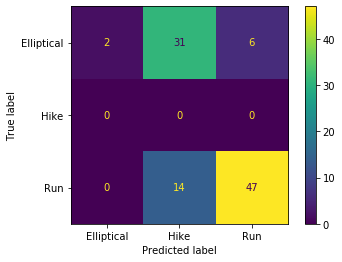

In [27]:
plot_confusion_matrix(model,X2_test_scaled,y2)

In [28]:
predictions2 = model.predict(X2_test_scaled)
predictions2

array(['Hike', 'Run', 'Hike', 'Hike', 'Run', 'Hike', 'Run', 'Run', 'Hike',
       'Hike', 'Hike', 'Hike', 'Run', 'Hike', 'Run', 'Run', 'Hike', 'Run',
       'Run', 'Hike', 'Hike', 'Hike', 'Hike', 'Run', 'Hike', 'Elliptical',
       'Run', 'Run', 'Run', 'Run', 'Run', 'Hike', 'Run', 'Run', 'Run',
       'Hike', 'Hike', 'Hike', 'Run', 'Hike', 'Run', 'Hike', 'Run',
       'Hike', 'Hike', 'Run', 'Run', 'Run', 'Hike', 'Run', 'Run', 'Run',
       'Run', 'Hike', 'Run', 'Hike', 'Run', 'Run', 'Run', 'Hike', 'Hike',
       'Run', 'Run', 'Run', 'Run', 'Hike', 'Hike', 'Hike', 'Run', 'Hike',
       'Run', 'Run', 'Run', 'Run', 'Hike', 'Run', 'Run', 'Hike', 'Hike',
       'Hike', 'Run', 'Run', 'Run', 'Hike', 'Hike', 'Hike', 'Run', 'Hike',
       'Hike', 'Hike', 'Run', 'Elliptical', 'Run', 'Run', 'Run', 'Hike',
       'Hike', 'Run', 'Hike', 'Run'], dtype=object)

In [34]:
prediction_df = pd.DataFrame({"Prediction": predictions2, "Incorrectly Labeled": y2, "Correctly Labeled": y3}).reset_index(drop=True)
prediction_df.head(5)
prediction_df.to_excel('andrew_predictions.xlsx', engine='xlsxwriter')  

In [31]:
cm2 = confusion_matrix(y3,predictions2)
cm2

array([[ 2, 31,  6],
       [ 0, 14,  1],
       [ 0,  0, 46]], dtype=int64)

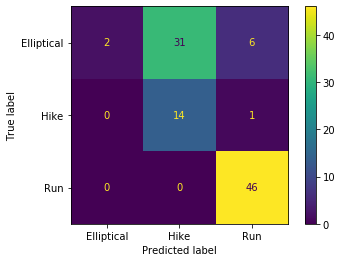

In [33]:
plot_confusion_matrix(model,X2_test_scaled,y3)